#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 1 (20 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A0_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 

# Student name:




##**Background**
Selection of housing is always difficult for someone seeking for a suitable one as it includes various factors and preferences. People prefer to buy a house considering many criteria like- population, quality of life, financial capability, as well as social and natural environments around the housing block. In this assignment you will be helping people choosing suitable housing for them according to their needs.
##**Dataset**
**Dataset file name:** housing_dataset.csv

**Dataset description:** Dataset contains total 10 features (columns). It contains the location, housing age, population, number of families in a housing (block), number of rooms, average income of the families in that housing, ocean proximity and other informaiton. Each row indicates a record of a housing block containing the features mentioned earlier.

**Features:** 

1.   latitude (float): Latitude of the location of a housing in conventional geospace
2.   longitude (float): Longitude of the location of a housing in conventional geospace
3.   housing_age (int): Age of the housing in year, the higher number indicates the older housing
4.    total_rooms (int): Total number of rooms in a housing
5.    total_bedrooms (int): Total number of bedrooms in a housing
6.    population (int): Total population of a housing
7.    families (int): Total number of families living in a housing
8.    average_income (float): Average income of the member of a housing in a scale of Tousand Dollar Per Month
9.    ocean_proximity (string): Describing how close the housing is to the ocean
10.   house_value (int): Average individual house price of a housing in Dollers




##**Part-1: Basic Calculations:**  *(8 marks: 8 questions x 1 marks each)*


1.   Find the distances of the farthest and nearest housing blocks from the house block described in the first row of the dataset.

In [47]:
# We need pandas, numpy, 
import pandas as pd
import numpy as np
from math import radians

def get_gps_coordinates(row):
    return (row['latitude'], row['longitude'])

def get_haversine_distance(lat1,lon1, row):
    #get coordinates from row
    lat2,lon2 = get_gps_coordinates(row)
    #change to radians to use with haversine formula
    lat1,lon1, lat2,lon2 = map(radians, [lat1,lon1, lat2,lon2])
    #calculate haversine distance
    distance = 2 * np.arcsin(( np.sin((lat2-lat1)/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2)**2 )**.5)
    #convert to km by multiplying with earth's radius
    km = 6367 * distance
    return km

# Read dataset
df = pd.read_csv('housing_dataset.csv')
# Get first row
lat,lon = get_gps_coordinates(df.iloc[0])
# Add new column distance from haversine formula
df['distance'] = df.apply(lambda row: get_haversine_distance(lat,lon, row), axis=1)
# Remove first row form df
df1=df.iloc[1:]
# Get max and min distance
print("Maximum distance in KM",df1['distance'].max())
print('Minimum distance in KM',df1['distance'].min())
# No need to sort
#df.sort_values( by='distance')

Maximum distance in KM 895.7150559809536
Minimum distance in KM 0.877108811954986


2.   Calculate the average age of the house blocks near the ocean.

In [48]:
# Separate only data that are near ocean
#df_no = df[df['ocean_proximity']=='NEAR OCEAN']

# Aggregate all values by column ocean_proximity
aggregated = df.groupby('ocean_proximity').agg(np.mean)
# Average age of household blocks near ocean
aggregated.loc['NEAR OCEAN']['housing_age']


29.347253574115875

3.   Find the income of the housing block with the most and least population density (per family).

In [109]:
# Get population density by dividing population by number of families in housing block
df['population_density'] = df['population']/df['families']
# Get row with max population density
rmax = df[df['population_density']==df['population_density'].max()]
print('The household with highest population density of',rmax.iloc[0,-1],'is',rmax.iloc[0,7])
# Get row with min population density
rmin = df[df['population_density']==df['population_density'].min()]
print('The household with highest population density of',rmin.iloc[0,-1],'is',rmin.iloc[0,7])

The household with highest population density of 1243.3333333333333 is 10.2264
The household with highest population density of 0.6923076923076923 is 2.5893


4.   Calculate the price difference between the latest and oldest housing block from the dataset.

In [124]:
# Find latest and oldest housing blocks
oldest = df[df['housing_age']==df['housing_age'].max()]
latest = df[df['housing_age']==df['housing_age'].min()]
# Price difference within the group
oldest_min = oldest['house_value'].min()
oldest_avg = oldest.mean()['house_value']
oldest_max = oldest['house_value'].max()
print("For oldest housing, min, avg, max, difference are: ",oldest_min, oldest_avg, oldest_max, oldest_max-oldest_min)
latest_min = latest['house_value'].min()
latest_avg = latest.mean()['house_value']
latest_max = latest['house_value'].max()
print("For latest housing, min, avg, max, difference are: ",latest_min, latest_avg, latest_max, latest_max-latest_min)
#price difference among different group
allhousing = pd.concat([oldest,latest])
all_min = allhousing['house_value'].min()
all_avg = allhousing.mean()['house_value']
all_max = allhousing['house_value'].max()
print("For highest and lowest housing, min, avg, max, difference are: ",all_min, all_avg, all_max, all_max-all_min)

For oldest housing, min, avg, max, difference are:  14999 275420.87117046345 500001 485002
For latest housing, min, avg, max, difference are:  55000 144300.0 191300 136300
For highest and lowest housing, min, avg, max, difference are:  14999 275010.1558339859 500001 485002


5.   Calculate the cheapest price per room from the dataset.

In [128]:
# INSERT your code here.
df['price_per_room'] = df['house_value']/df['total_rooms']
df['price_per_room'].min()

1.595444807757357

6.   Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

In [144]:
# INSERT your code here.
pd_max = df[df['average_income']==df['average_income'].max()]['population_density'].mean()
pd_min = df[df['average_income']==df['average_income'].min()]['population_density'].mean()
print('Population density of most wealthy is',pd_max,'and least wealthy is',pd_min)

Population density of most wealthy is 3.307545896889619 and least wealthy is 3.4754772079772085


7.   Calculate and print the total housing blocks located in the same place.

In [198]:
# INSERT your code here.
# Don't know how to define same place?
# considering ocean proximity as same place
df.groupby('ocean_proximity').count()

,longitude,latitude,housing_age,total_rooms,total_bedrooms,population,families,average_income,house_value,distance,population_density,price_per_room,price_difference
ocean_proximity,,,,,,,,,,,,,
<1H OCEAN,9136,9136,9136,9136,9034,9136,9136,9136,9136,9136,9136,9136,9136
INLAND,6551,6551,6551,6551,6496,6551,6551,6551,6551,6551,6551,6551,6551
ISLAND,5,5,5,5,5,5,5,5,5,5,5,5,5
NEAR BAY,2290,2290,2290,2290,2270,2290,2290,2290,2290,2290,2290,2290,2290
NEAR OCEAN,2658,2658,2658,2658,2628,2658,2658,2658,2658,2658,2658,2658,2658


8.   Calculate the price of expensive room grouped by ocean proximity.

In [154]:
# INSERT your code here. 
df.groupby('ocean_proximity').max()['price_per_room']

ocean_proximity
<1H OCEAN     22500.000000
INLAND        68750.000000
ISLAND          451.807229
NEAR BAY      62500.125000
NEAR OCEAN    23333.333333
Name: price_per_room, dtype: float64

##**Part-2: Visualization:**  *(6 marks: 3 question x 2 marks each)*


1.   Draw the population scatter plot against housing age and another against ocean proximity. From the graph conclude an assumption.

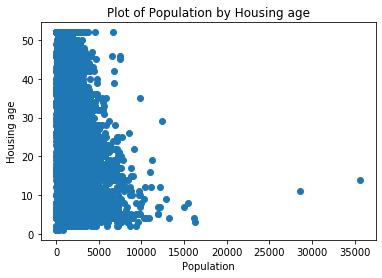

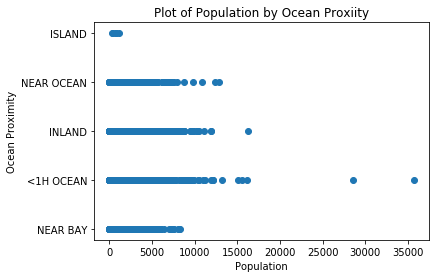

In [168]:
# INSERT your code here.
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)
ax.set_xlabel('Population')
ax.set_ylabel('Housing age')
ax.set_title("Plot of Population by Housing age")
ax.scatter(df['population'],df['housing_age']) #You can also add more variables here to represent color and size.
plt.show()

fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)
ax.set_xlabel('Population')
ax.set_ylabel('Ocean Proximity')
ax.set_title("Plot of Population by Ocean Proxiity")
ax.scatter(df['population'],df['ocean_proximity']) #You can also add more variables here to represent color and size.
plt.show()

2.  Draw a bar diagram of average values of all suitable columns. (excluding latitude, longitude and ocean proximity of course).

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


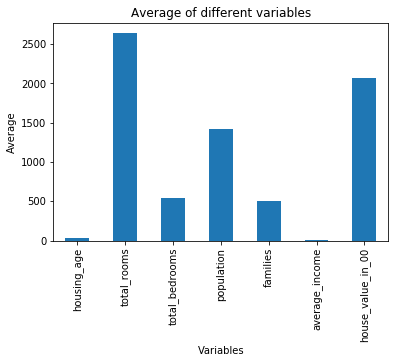

In [169]:
# INSERT your code here.
df1 = df[['housing_age','total_rooms','total_bedrooms','population','families','average_income','house_value']]
# Following two lines for reducing assymetricity in graph. May be ommitted
df1['house_value_in_00'] = df1['house_value']/100
df1 = df1[['housing_age','total_rooms','total_bedrooms','population','families','average_income','house_value_in_00']]

averaged = df1.mean()

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Variables')
ax1.set_ylabel('Average')
ax1.set_title("Average of different variables")
averaged.plot(kind='bar')
plt.show()

3.   Visualize the differences in housing prices from the average price of housing using a bar diagram.

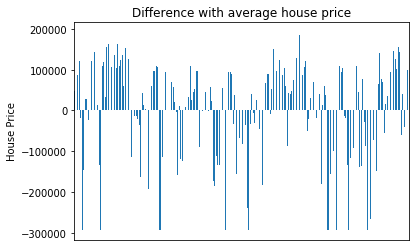

In [178]:
# INSERT your code here.
average_price = df.mean()['house_value']
df['price_difference'] = average_price-df['house_value']


fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('House Price')
ax1.set_title("Difference with average house price")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
df['price_difference'].plot(kind='bar')
plt.show()

##**Part-3: File Management:**  *(6 marks: 2 question x 3 marks each)*

 

1.   Save the details of all housing blocks in a csv file having houses near oceans and  lower than the average of the housing value.

In [180]:
# INSERT your code here.
df2 = df[df['ocean_proximity']=='NEAR OCEAN']
df2 = df2[df2['price_difference']<0]
df2 = df2[['longitude','latitude','housing_age','total_rooms','total_bedrooms','population','families','average_income','ocean_proximity','house_value']]
df2.to_csv('near_oceans.csv')
df2

,longitude,latitude,housing_age,total_rooms,total_bedrooms,population,families,average_income,ocean_proximity,house_value
5276,-118.55,33.99,39,2603,456.0,928,410,7.9096,NEAR OCEAN,500001
5618,-118.23,33.78,20,59,24.0,69,23,2.5588,NEAR OCEAN,350000
5635,-118.28,33.75,21,2442,719.0,1916,646,1.2276,NEAR OCEAN,208300
5636,-118.28,33.74,16,855,271.0,486,250,0.7591,NEAR OCEAN,350000
5641,-118.30,33.74,47,2223,410.0,1163,413,4.4671,NEAR OCEAN,270800
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,NEAR OCEAN,500001
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,NEAR OCEAN,321800
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,NEAR OCEAN,428600
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,NEAR OCEAN,357600







2.   Create a new housing dataset (a csv file) having only the location, total rooms and housing price information.






In [183]:
# INSERT your code here.
df3 = df[['longitude','latitude','total_rooms','house_value']]
df3.to_csv('rooms.csv')
df3

,longitude,latitude,total_rooms,house_value
0,-122.23,37.88,880,452600
1,-122.22,37.86,7099,358500
2,-122.24,37.85,1467,352100
3,-122.25,37.85,1274,341300
4,-122.25,37.85,1627,342200
...,...,...,...,...
20635,-121.09,39.48,1665,78100
20636,-121.21,39.49,697,77100
20637,-121.22,39.43,2254,92300
20638,-121.32,39.43,1860,84700
